[ 사용한 데이터 ]
- Training file names:  ( train_0 ~ train_2 ).tfrecords - 약 13GB
- Validation file names:  ( val_0 ).tfrecords - 약 1.6GB

In [4]:
!python data_processing/urban_sound_8K.py
!python data_processing/mozilla_common_voice.py
!python data_processing/feature_extractor.py
!python data_processing/dataset.py

2022-03-02 11:21:07.272653: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [18]:
!python data_processing/create_dataset.py

Total number of training examples: 12135
# of Training clean files: 11135
# of  Validation clean files: 1000
Number of classes: [0 1 2 3 4 5 6 7 8 9]
Class c: 0 has: 900 files
Class c: 1 has: 396 files
Class c: 2 has: 900 files
Class c: 3 has: 900 files
Class c: 4 has: 900 files
Class c: 5 has: 907 files
Class c: 6 has: 342 files
Class c: 7 has: 904 files
Class c: 8 has: 846 files
Class c: 9 has: 900 files
Noise training: 7695
Noise validation: 200
Skipping /home/seungmiya13/data/tfrecords/val_0.tfrecords
Skipping /home/seungmiya13/data/tfrecords/train_0.tfrecords
Skipping /home/seungmiya13/data/tfrecords/train_1.tfrecords
Skipping /home/seungmiya13/data/tfrecords/train_2.tfrecords
Total number of training examples: 7016
# of Testing clean files: 7016
Class c: 0 has: 100 files
Class c: 1 has: 33 files
Class c: 2 has: 100 files
Class c: 3 has: 100 files
Class c: 4 has: 100 files
Class c: 5 has: 93 files
Class c: 6 has: 32 files
Class c: 7 has: 96 files
Class c: 8 has: 83 files
Class c: 

In [2]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1785095191399102838,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15037189376
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1670857645278566917
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"]

2022-03-03 05:46:04.849592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 05:46:04.849812: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-03 05:46:04.849852: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-03 05:46:04.849882: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-03 05:46:04.849892: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-03-03 05:46:04.849902: I tensorflow/stream_executor/p

In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

if device_name != '/device:GPU:0' :
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-03-03 05:48:23.457556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 05:48:23.457780: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-03 05:48:23.457818: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-03 05:48:23.457847: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-03 05:48:23.457857: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-03-03 05:48:23.457867: I tensorflow/stream_executor/p

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import librosa
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import IPython.display as ipd
import librosa.display
import scipy
import glob
import numpy as np
import math
import warnings
import pickle
from sklearn.utils import shuffle
import zipfile
# Load the TensorBoard notebook extension.
%load_ext tensorboard

2022-03-05 03:45:17.974221: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-03-05 03:45:21.740007: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-05 03:45:21.754181: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-05 03:45:21.826484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-05 03:45:21.826685: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.3

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10298465700791676006,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15481722688
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16904568969564180140
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"]

rm/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-03-05 03:45:21.947079: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-03-05 03:45:21.959307: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so.10
2022-03-05 03:45:22.033944: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusolver.so.10
2022-03-05 03:45:22.043872: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusparse.so.10
2022-03-05 03:45:22.140651: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-03-05 03:45:22.140934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so r

In [4]:
tf.random.set_seed(999)
np.random.seed(999)

In [5]:
path_to_dataset = os.getenv('HOME')+'/data/tfrecords'

In [6]:
# get training and validation tf record file names
train_tfrecords_filenames = glob.glob(os.path.join(path_to_dataset, 'train_*'))
val_tfrecords_filenames = glob.glob(os.path.join(path_to_dataset, 'val_*'))

# suffle the file names for training
np.random.shuffle(train_tfrecords_filenames)
print("Training file names: ", train_tfrecords_filenames)
print("Validation file names: ", val_tfrecords_filenames)

Training file names:  ['/home/seungmiya13/data/tfrecords/train_2.tfrecords', '/home/seungmiya13/data/tfrecords/train_1.tfrecords', '/home/seungmiya13/data/tfrecords/train_0.tfrecords']
Validation file names:  ['/home/seungmiya13/data/tfrecords/val_0.tfrecords']


In [7]:
windowLength = 256
overlap      = round(0.25 * windowLength) # overlap of 75%
ffTLength    = windowLength
inputFs      = 48e3
fs           = 16e3
numFeatures  = ffTLength//2 + 1
numSegments  = 8
print("windowLength:",windowLength)
print("overlap:",overlap)
print("ffTLength:",ffTLength)
print("inputFs:",inputFs)
print("fs:",fs)
print("numFeatures:",numFeatures)
print("numSegments:",numSegments)

windowLength: 256
overlap: 64
ffTLength: 256
inputFs: 48000.0
fs: 16000.0
numFeatures: 129
numSegments: 8


In [42]:
ls

README.md                      __pycache__/                         logs/
SpeechDenoiserCNN-Copy1.ipynb  data_processing/                     model.png
SpeechDenoiserCNN-Copy2.ipynb  denoiser_cnn_log_mel_generator.h5    utils.py
SpeechDenoiserCNN.ipynb        denoiser_cnn_log_mel_generator_1.h5  wandb/
Test_001.ipynb                 denoiser_cnn_log_mel_generator_2.h5


In [43]:
cd ..

/home/seungmiya13


In [44]:
ls

Download/  Test-1.ipynb    anaconda3/        cnn-audio-denoiser/  kaggle.zip
TEST_soo/  Untitled.ipynb  audio_denoising/  data/


In [45]:
cd data

/home/seungmiya13/data


In [46]:
ls

UrbanSound8K/        cv-corpus-8.0-2022-01-19-en.tar.gz  en.tar
UrbanSound8K.tar.gz  en/                                 tfrecords/


In [47]:
cd en

/home/seungmiya13/data/en


In [48]:
ls

clips/   invalidated.tsv  other.tsv  test.tsv   validated.tsv
dev.tsv  list.txt         test/      train.tsv


In [49]:
cd test

/home/seungmiya13/data/en/test


In [50]:
ls

clean_sample.wav


In [8]:
mozilla_basepath = os.getenv('HOME')+ "/data/en"
UrbanSound8K_basepath = os.getenv('HOME')+ '/data/UrbanSound8K'

## Prepare Input features

In [9]:
def tf_record_parser(record):
    keys_to_features = {
        "noise_stft_phase": tf.io.FixedLenFeature((), tf.string, default_value=""),
        'noise_stft_mag_features': tf.io.FixedLenFeature([], tf.string),
        "clean_stft_magnitude": tf.io.FixedLenFeature((), tf.string)
    }

    features = tf.io.parse_single_example(record, keys_to_features)

    noise_stft_mag_features = tf.io.decode_raw(features['noise_stft_mag_features'], tf.float32)
    clean_stft_magnitude = tf.io.decode_raw(features['clean_stft_magnitude'], tf.float32)
    noise_stft_phase = tf.io.decode_raw(features['noise_stft_phase'], tf.float32)

    # reshape input and annotation images
    noise_stft_mag_features = tf.reshape(noise_stft_mag_features, (129, 8, 1), name="noise_stft_mag_features")
    clean_stft_magnitude = tf.reshape(clean_stft_magnitude, (129, 1, 1), name="clean_stft_magnitude")
    noise_stft_phase = tf.reshape(noise_stft_phase, (129,), name="noise_stft_phase")

    return noise_stft_mag_features, clean_stft_magnitude

## Create tf.Data.Dataset

In [10]:
train_dataset = tf.data.TFRecordDataset([train_tfrecords_filenames])
train_dataset = train_dataset.map(tf_record_parser)
train_dataset = train_dataset.shuffle(8192)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(512)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-03-05 03:46:28.670856: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-05 03:46:28.671266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-05 03:46:28.671494: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-05 03:46:28.671595: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-05 03:46:28.671625: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-05 03:46:28.671643: I tensorflow/stream_executor/platform/de

In [11]:
test_dataset = tf.data.TFRecordDataset([val_tfrecords_filenames])
test_dataset = test_dataset.map(tf_record_parser)
test_dataset = test_dataset.repeat(1)
test_dataset = test_dataset.batch(512)

## Model Training

In [12]:
from tensorflow.keras.layers import Conv2D, Input, LeakyReLU, Flatten, Dense, Reshape, Conv2DTranspose, BatchNormalization, Activation
from tensorflow.keras import Model, Sequential

In [15]:
def conv_block(x, filters, kernel_size, strides, padding='same', use_bn=True):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(0.0006))(x)
    x = Activation('relu')(x)
    if use_bn:
        x = BatchNormalization()(x)
    return x

In [16]:
def full_pre_activation_block(x, filters, kernel_size, strides, padding='same', use_bn=True):
    shortcut = x
    in_channels = x.shape[-1]

    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)

    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=in_channels, kernel_size=kernel_size, strides=strides, padding='same')(x)

    return shortcut + x

In [17]:
def build_model(l2_strength):
    inputs = Input(shape=[numFeatures,numSegments,1])
    x = inputs

    # -----
    x = tf.keras.layers.ZeroPadding2D(((4,4), (0,0)))(x)
    x = Conv2D(filters=18, kernel_size=[9,8], strides=[1, 1], padding='valid', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    skip0 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
                 kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(skip0)
    x = BatchNormalization()(x)

    x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    # -----
    x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    skip1 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
                 kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(skip1)
    x = BatchNormalization()(x)

    x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    # ----
    x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    # ----
    x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = x + skip1
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    # ----
    x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = x + skip0
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    # ----
    x = tf.keras.layers.SpatialDropout2D(0.2)(x)
    x = Conv2D(filters=1, kernel_size=[129,1], strides=[1, 1], padding='same')(x)

    model = Model(inputs=inputs, outputs=x)

    optimizer = tf.keras.optimizers.Adam(3e-4)
    #optimizer = RAdam(total_steps=10000, warmup_proportion=0.1, min_lr=3e-4)

    model.compile(optimizer=optimizer, loss='mse', 
                metrics=[tf.keras.metrics.RootMeanSquaredError('rmse')])
    return model

In [18]:
model = build_model(l2_strength=0.0)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 129, 8, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 137, 8, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 129, 1, 18)   1296        zero_padding2d[0][0]             
__________________________________________________________________________________________________
activation (Activation)         (None, 129, 1, 18)   0           conv2d[0][0]                     
______________________________________________________________________________________________

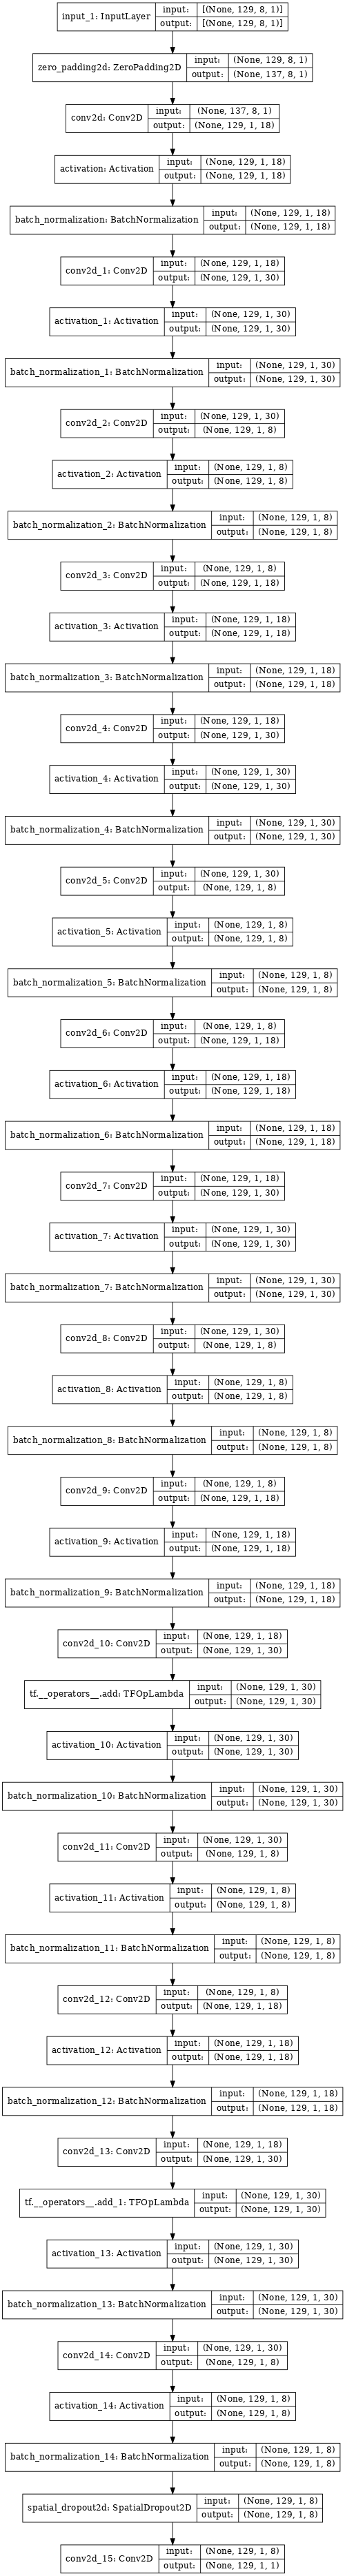

In [19]:
# You might need to install the following dependencies: sudo apt install python-pydot python-pydot-ng graphviz
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [20]:
# wandb 사용하기
import wandb

wandb.init(project="my-test-project", entity="seungmiya13")

wandb: Currently logged in as: seungmiya13 (use `wandb login --relogin` to force relogin)
2022-03-05 03:47:29.273165: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [21]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

In [25]:
baseline_val_loss = model.evaluate(test_dataset)[0]
print(f"Baseline accuracy {baseline_val_loss}")

393/393 [==============================] - 15s 39ms/step - loss: 0.1492 - rmse: 0.3863
Baseline accuracy 0.14920593798160553


In [22]:
def l2_norm(vector):
    return np.square(vector)

def SDR(denoised, cleaned, eps=1e-7): # Signal to Distortion Ratio
    a = l2_norm(denoised)
    b = l2_norm(denoised - cleaned)
    a_b = a / b
    return np.mean(10 * np.log10(a_b + eps))

In [23]:
from wandb.keras import WandbCallback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, baseline=None)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, update_freq='batch')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='./denoiser_cnn_log_mel_generator.h5', 
                                                         monitor='val_loss', save_best_only=True)

model.fit(train_dataset,
         steps_per_epoch=600, # you might need to change this
         validation_data=test_dataset,
         epochs=400,
         callbacks=[early_stopping_callback, checkpoint_callback, WandbCallback()]
        )

2022-03-05 03:49:15.440231: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-05 03:49:15.440814: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299995000 Hz


Epoch 1/400


2022-03-05 03:49:17.432545: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-03-05 03:49:18.691068: W tensorflow/stream_executor/gpu/asm_compiler.cc:98] *** WARNING *** You are using ptxas 9.1.108, which is older than 9.2.88. ptxas 9.x before 9.2.88 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You do not need to update to CUDA 9.2.88; cherry-picking the ptxas binary is sufficient.
2022-03-05 03:49:18.812085: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


600/600 [==============================] - 37s 56ms/step - loss: 0.6120 - rmse: 0.7634 - val_loss: 0.2492 - val_rmse: 0.4992
Epoch 2/400
600/600 [==============================] - 33s 55ms/step - loss: 0.2389 - rmse: 0.4888 - val_loss: 0.2222 - val_rmse: 0.4713
Epoch 3/400
600/600 [==============================] - 36s 59ms/step - loss: 0.2100 - rmse: 0.4582 - val_loss: 0.1999 - val_rmse: 0.4471
Epoch 4/400
600/600 [==============================] - 33s 55ms/step - loss: 0.2012 - rmse: 0.4485 - val_loss: 0.1932 - val_rmse: 0.4396
Epoch 5/400
600/600 [==============================] - 30s 50ms/step - loss: 0.1910 - rmse: 0.4370 - val_loss: 0.1950 - val_rmse: 0.4416
Epoch 6/400
600/600 [==============================] - 30s 51ms/step - loss: 0.1856 - rmse: 0.4308 - val_loss: 0.1921 - val_rmse: 0.4383
Epoch 7/400
600/600 [==============================] - 30s 50ms/step - loss: 0.1813 - rmse: 0.4258 - val_loss: 0.1806 - val_rmse: 0.4250
Epoch 8/400
600/600 [==============================] 

600/600 [==============================] - 23s 38ms/step - loss: 0.1426 - rmse: 0.3776 - val_loss: 0.1571 - val_rmse: 0.3964
Epoch 120/400
600/600 [==============================] - 23s 38ms/step - loss: 0.1424 - rmse: 0.3774 - val_loss: 0.1601 - val_rmse: 0.4001
Epoch 121/400
600/600 [==============================] - 23s 38ms/step - loss: 0.1465 - rmse: 0.3827 - val_loss: 0.1546 - val_rmse: 0.3932
Epoch 122/400
600/600 [==============================] - 23s 38ms/step - loss: 0.1388 - rmse: 0.3725 - val_loss: 0.1591 - val_rmse: 0.3989
Epoch 123/400
600/600 [==============================] - 23s 38ms/step - loss: 0.1439 - rmse: 0.3793 - val_loss: 0.1599 - val_rmse: 0.3999
Epoch 124/400
600/600 [==============================] - 23s 38ms/step - loss: 0.1407 - rmse: 0.3750 - val_loss: 0.1590 - val_rmse: 0.3987
Epoch 125/400
600/600 [==============================] - 25s 41ms/step - loss: 0.1408 - rmse: 0.3752 - val_loss: 0.1526 - val_rmse: 0.3906
Epoch 126/400
600/600 [==================

600/600 [==============================] - 24s 40ms/step - loss: 0.1386 - rmse: 0.3723 - val_loss: 0.1597 - val_rmse: 0.3997
Epoch 179/400
600/600 [==============================] - 22s 37ms/step - loss: 0.1417 - rmse: 0.3764 - val_loss: 0.1529 - val_rmse: 0.3911
Epoch 180/400
600/600 [==============================] - 23s 38ms/step - loss: 0.1400 - rmse: 0.3741 - val_loss: 0.1528 - val_rmse: 0.3909
Epoch 181/400
600/600 [==============================] - 25s 41ms/step - loss: 0.1392 - rmse: 0.3730 - val_loss: 0.1639 - val_rmse: 0.4048
Epoch 182/400
600/600 [==============================] - 24s 41ms/step - loss: 0.1383 - rmse: 0.3719 - val_loss: 0.1594 - val_rmse: 0.3992
Epoch 183/400
600/600 [==============================] - 25s 41ms/step - loss: 0.1399 - rmse: 0.3741 - val_loss: 0.1601 - val_rmse: 0.4001
Epoch 184/400
600/600 [==============================] - 24s 40ms/step - loss: 0.1366 - rmse: 0.3696 - val_loss: 0.1565 - val_rmse: 0.3956
Epoch 185/400
600/600 [==================

600/600 [==============================] - 24s 40ms/step - loss: 0.1391 - rmse: 0.3730 - val_loss: 0.1551 - val_rmse: 0.3939
Epoch 238/400
600/600 [==============================] - 24s 40ms/step - loss: 0.1377 - rmse: 0.3710 - val_loss: 0.1733 - val_rmse: 0.4163
Epoch 239/400
600/600 [==============================] - 24s 40ms/step - loss: 0.1390 - rmse: 0.3728 - val_loss: 0.1529 - val_rmse: 0.3911
Epoch 240/400
600/600 [==============================] - 24s 40ms/step - loss: 0.1382 - rmse: 0.3718 - val_loss: 0.1562 - val_rmse: 0.3952
Epoch 241/400
600/600 [==============================] - 26s 43ms/step - loss: 0.1377 - rmse: 0.3711 - val_loss: 0.1569 - val_rmse: 0.3962
Epoch 242/400
600/600 [==============================] - 26s 43ms/step - loss: 0.1387 - rmse: 0.3724 - val_loss: 0.1621 - val_rmse: 0.4026
Epoch 243/400
600/600 [==============================] - 23s 39ms/step - loss: 0.1384 - rmse: 0.3721 - val_loss: 0.1538 - val_rmse: 0.3922
Epoch 244/400
600/600 [==================

In [26]:
val_loss = model.evaluate(test_dataset)[0]
if val_loss < baseline_val_loss:
  print("New model saved.")
  model.save('./denoiser_cnn_log_mel_generator.h5')

393/393 [==============================] - 14s 35ms/step - loss: 0.1492 - rmse: 0.3863


## Testing

In [27]:
def read_audio(filepath, sample_rate, normalize=True):
    """Read an audio file and return it as a numpy array"""
    audio, sr = librosa.load(filepath, sr=sample_rate)
    if normalize:
      div_fac = 1 / np.max(np.abs(audio)) / 3.0
      audio = audio * div_fac
    return audio, sr
        
def add_noise_to_clean_audio(clean_audio, noise_signal):
    """Adds noise to an audio sample"""
    if len(clean_audio) >= len(noise_signal):
        # print("The noisy signal is smaller than the clean audio input. Duplicating the noise.")
        while len(clean_audio) >= len(noise_signal):
            noise_signal = np.append(noise_signal, noise_signal)

    ## Extract a noise segment from a random location in the noise file
    ind = np.random.randint(0, noise_signal.size - clean_audio.size)

    noiseSegment = noise_signal[ind: ind + clean_audio.size]

    speech_power = np.sum(clean_audio ** 2)
    noise_power = np.sum(noiseSegment ** 2)
    noisyAudio = clean_audio + np.sqrt(speech_power / noise_power) * noiseSegment
    return noisyAudio

def play(audio, sample_rate):
    ipd.display(ipd.Audio(data=audio, rate=sample_rate))  # load a local WAV file

In [28]:
class FeatureExtractor:
    def __init__(self, audio, *, windowLength, overlap, sample_rate):
        self.audio = audio
        self.ffT_length = windowLength
        self.window_length = windowLength
        self.overlap = overlap
        self.sample_rate = sample_rate
        self.window = scipy.signal.hamming(self.window_length, sym=False)

    def get_stft_spectrogram(self):
        return librosa.stft(self.audio, n_fft=self.ffT_length, win_length=self.window_length, hop_length=self.overlap,
                            window=self.window, center=True)

    def get_audio_from_stft_spectrogram(self, stft_features):
        return librosa.istft(stft_features, win_length=self.window_length, hop_length=self.overlap,
                             window=self.window, center=True)

    def get_mel_spectrogram(self):
        return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',
                                           n_fft=self.ffT_length, hop_length=self.overlap, center=True)

    def get_audio_from_mel_spectrogram(self, M):
        return librosa.feature.inverse.mel_to_audio(M, sr=self.sample_rate, n_fft=self.ffT_length, hop_length=self.overlap,
                                             win_length=self.window_length, window=self.window,
                                             center=True, pad_mode='reflect', power=2.0, n_iter=32, length=None)

In [93]:
cleanAudio, sr = read_audio(os.path.join(mozilla_basepath, 'test', 'clean_sample.wav'), sample_rate=fs)
print("Min:", np.min(cleanAudio),"Max:",np.max(cleanAudio))
ipd.Audio(data=cleanAudio, rate=sr) # load a local WAV file

Min: -0.3333333 Max: 0.30261758


In [91]:
noiseAudio, sr = read_audio(os.path.join(UrbanSound8K_basepath, 'audio/fold9', '99500-2-0-50.wav'), sample_rate=fs)
print("Min:", np.min(noiseAudio),"Max:",np.max(noiseAudio))
ipd.Audio(data=noiseAudio, rate=sr) # load a local WAV file

Min: -0.30033544 Max: 0.33333334


In [101]:
noiseAudio, sr = read_audio(os.path.join(UrbanSound8K_basepath, 'test', '7913-3-0-0.wav'), sample_rate=fs)
print("Min:", np.min(noiseAudio),"Max:",np.max(noiseAudio))
ipd.Audio(data=noiseAudio, rate=sr) # load a local WAV file

Min: -0.2916928 Max: 0.33333334


In [102]:
RMS_clean = math.sqrt(np.mean(cleanAudio**2))
noise = np.random.normal(0, 1.0, cleanAudio.shape[0])

In [108]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut,fs, order=5):
    nyq= 0.5*fs
    low= lowcut/nyq
    high= highcut/nyq
    b,a = butter(order, [low,high], btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs, order=5):
    b,a= butter_bandpass( lowcut, highcut, fs, order)
    y=lfilter(b,a,data)
    return y

In [114]:
noise = np.random.normal(0, 1.0, cleanAudio.shape[0])
hiss = butter_bandpass_filter(noise, 300, 7999, 16000)
print("Min:", np.min(hiss),"Max:",np.max(noise))
ipd.Audio(data=hiss, rate=sr) # load a local WAV file

Min: -3.7225034400825803 Max: 4.070653439249416


In [115]:
noise = np.random.normal(0, 1.0, cleanAudio.shape[0])
print("Min:", np.min(noise),"Max:",np.max(noise))
ipd.Audio(data=noise, rate=sr) # load a local WAV file

Min: -3.9117673382189535 Max: 3.741920018289654


In [104]:
cleanAudioFeatureExtractor = FeatureExtractor(cleanAudio, windowLength=windowLength, overlap=overlap, sample_rate=sr)
stft_features = cleanAudioFeatureExtractor.get_stft_spectrogram()
stft_features = np.abs(stft_features)
print("Min:", np.min(stft_features),"Max:",np.max(stft_features))

Min: 3.0009497e-09 Max: 11.036943


In [118]:
speech_power = np.sum(cleanAudio ** 2)
speech_power

101.00376

In [119]:
noise_power = np.sum(hiss ** 2)
noise_power

26683.411576772334

In [120]:
np.sqrt(speech_power / noise_power)

0.061524500419615685

In [134]:
noisyAudio = cleanAudio + hiss*1e-2
ipd.Audio(data=noisyAudio, rate=fs) # load a local WAV file

In [136]:
def prepare_input_features(stft_features):
    # Phase Aware Scaling: To avoid extreme differences (more than
    # 45 degree) between the noisy and clean phase, the clean spectral magnitude was encoded as similar to [21]:
    noisySTFT = np.concatenate([stft_features[:,0:numSegments-1], stft_features], axis=1)
    stftSegments = np.zeros((numFeatures, numSegments , noisySTFT.shape[1] - numSegments + 1))

    for index in range(noisySTFT.shape[1] - numSegments + 1):
        stftSegments[:,:,index] = noisySTFT[:,index:index + numSegments]
    return stftSegments

In [137]:
noiseAudioFeatureExtractor = FeatureExtractor(noisyAudio, windowLength=windowLength, overlap=overlap, sample_rate=sr)
noise_stft_features = noiseAudioFeatureExtractor.get_stft_spectrogram()

# Paper: Besides, spectral phase was not used in the training phase.
# At reconstruction, noisy spectral phase was used instead to
# perform in- verse STFT and recover human speech.
noisyPhase = np.angle(noise_stft_features)
print(noisyPhase.shape)
noise_stft_features = np.abs(noise_stft_features)

mean = np.mean(noise_stft_features)
std = np.std(noise_stft_features)
noise_stft_features = (noise_stft_features - mean) / std

(129, 436)


In [138]:
predictors = prepare_input_features(noise_stft_features)

In [139]:
predictors = np.reshape(predictors, (predictors.shape[0], predictors.shape[1], 1, predictors.shape[2]))
predictors = np.transpose(predictors, (3, 0, 1, 2)).astype(np.float32)
print('predictors.shape:', predictors.shape)

predictors.shape: (436, 129, 8, 1)


In [140]:
STFTFullyConvolutional = model.predict(predictors)
print(STFTFullyConvolutional.shape)

(436, 129, 1, 1)


In [141]:
def revert_features_to_audio(features, phase, cleanMean=None, cleanStd=None):
    # scale the outpus back to the original range
    if cleanMean and cleanStd:
        features = cleanStd * features + cleanMean

    phase = np.transpose(phase, (1, 0))
    features = np.squeeze(features)

    # features = librosa.db_to_power(features)
    features = features * np.exp(1j * phase)  # that fixes the abs() ope previously done

    features = np.transpose(features, (1, 0))
    return noiseAudioFeatureExtractor.get_audio_from_stft_spectrogram(features)

In [142]:
denoisedAudioFullyConvolutional = revert_features_to_audio(STFTFullyConvolutional, noisyPhase, mean, std)
print("Min:", np.min(denoisedAudioFullyConvolutional),"Max:",np.max(denoisedAudioFullyConvolutional))
ipd.Audio(data=denoisedAudioFullyConvolutional, rate=fs) # load a local WAV file

Min: -0.21912975708798993 Max: 0.2511333584009619


In [40]:
# A numeric identifier of the sound class -- Types of noise
# 0 = air_conditioner
# 1 = car_horn
# 2 = children_playing
# 3 = dog_bark
# 4 = drilling
# 5 = engine_idling
# 6 = gun_shot
# 7 = jackhammer
# 8 = siren
# 9 = street_music

Text(0.5, 1.0, 'Denoised Audio')

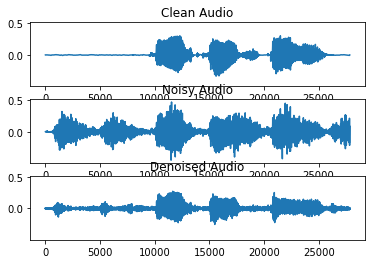

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)

ax1.plot(cleanAudio)
ax1.set_title("Clean Audio")

ax2.plot(noisyAudio)
ax2.set_title("Noisy Audio")

ax3.plot(denoisedAudioFullyConvolutional)
ax3.set_title("Denoised Audio")